## Load Libraries 

In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats
from scipy.stats import ttest_ind
import numpy as np
from scipy.special import comb
from scipy.stats import chi2, binom
from scipy.stats import f_oneway

## Load Datasets

In [27]:
UnemploymentUSA = pd.read_csv(r'C:\Users\lynds\Documents\Covid Unemployment USA Dataset.csv')
States = pd.read_csv(r'C:\Users\lynds\Downloads\6 unemployment states.csv')
USACovidCases = pd.read_csv(r'C:\Users\lynds\Documents\6_State_Covid_Cases_Deaths.csv')

## Review Data

In [28]:
class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)
    

In [29]:
display('UnemploymentUSA','States','USACovidCases')

,Month,Unemployment Rate
0,Feb-20,3.5
1,Mar-20,4.4
2,Apr-20,14.7
3,May-20,13.3
4,Jun-20,11.1
5,Jul-20,10.2
6,Aug-20,8.4
7,Sep-20,7.9
8,Oct-20,6.9
9,Nov-20,6.7


## Removing NaN

In [30]:
USACovidCases.dropna(inplace=True)

In [31]:
USACovidCases.head()

,submission_date,state,tot_cases,tot_death,new_case,pnew_case,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths,consent_deaths.1
2,7/9/2021,CA,3880618,63376,2411,0.0,63376.0,0.0,59,0.0,7/11/2021 0:00,Agree,Agree,Agree
3,5/4/2020,CA,54937,2178,1321,0.0,2178.0,0.0,40,0.0,5/6/2020 0:00,Agree,Agree,Agree
4,9/15/2021,CA,4574136,67001,7760,0.0,67001.0,0.0,188,0.0,9/17/2021 0:00,Agree,Agree,Agree
5,8/14/2020,CA,601075,10831,7934,0.0,10831.0,0.0,165,0.0,8/16/2020 0:00,Agree,Agree,Agree
6,6/7/2021,CA,3690868,62473,874,0.0,62473.0,0.0,3,0.0,6/9/2021 0:00,Agree,Agree,Agree


## Removing Unwanted Data

In [32]:
USACovidCases.drop(['new_case','pnew_case','conf_death','prob_death','new_death','created_at','consent_cases','consent_deaths.1','consent_deaths','pnew_death'],axis=1, inplace=True)

In [33]:
USACovidCases.head()

,submission_date,state,tot_cases,tot_death
2,7/9/2021,CA,3880618,63376
3,5/4/2020,CA,54937,2178
4,9/15/2021,CA,4574136,67001
5,8/14/2020,CA,601075,10831
6,6/7/2021,CA,3690868,62473


## Resetting Data Index

In [36]:
USACovidCases = USACovidCases.reset_index(drop=True)

In [37]:
UnemploymentUSA = UnemploymentUSA.reset_index(drop=True)

In [38]:
States = States.reset_index(drop=True)

## Merge Datasets

In [44]:
All_Unemployment = pd.merge(UnemploymentUSA, States)

In [45]:
display('All_Unemployment')

,Month,Unemployment Rate,WA_Unemployment Rate,MO_Unemploment rate,TX_Unemployment Rate,FL_Unemployment Rate,NY_Unemployment Rate,CA_Unemployment Rate
0,Feb-20,3.5,4.1,3.6,3.7,3.3,3.9,4.3
1,Mar-20,4.4,5.3,3.7,4.9,4.9,3.9,4.5
2,Apr-20,14.7,16.3,12.5,12.9,14.0,16.2,16.0
3,May-20,13.3,12.5,9.6,11.6,14.2,15.7,15.6
4,Jun-20,11.1,10.8,8.1,10.2,11.6,15.0,14.1
5,Jul-20,10.2,10.8,6.8,9.3,11.5,14.7,13.2
6,Aug-20,8.4,9.1,6.0,6.9,7.9,11.7,12.3
7,Sep-20,7.9,8.0,5.4,7.9,7.2,10.0,10.6
8,Oct-20,6.9,7.0,5.0,7.3,5.8,8.7,9.8
9,Nov-20,6.7,6.7,4.7,7.2,5.4,8.7,8.7


## Concatenate Datasets

In [48]:
All_Data = pd.concat( 
 [USACovidCases,All_Unemployment],
    axis = 1,
  sort = False
)

In [51]:
All_Data.head()

,submission_date,state,tot_cases,tot_death,Month,Unemployment Rate,WA_Unemployment Rate,MO_Unemploment rate,TX_Unemployment Rate,FL_Unemployment Rate,NY_Unemployment Rate,CA_Unemployment Rate
0,7/9/2021,CA,3880618,63376,Feb-20,3.5,4.1,3.6,3.7,3.3,3.9,4.3
1,5/4/2020,CA,54937,2178,Mar-20,4.4,5.3,3.7,4.9,4.9,3.9,4.5
2,9/15/2021,CA,4574136,67001,Apr-20,14.7,16.3,12.5,12.9,14.0,16.2,16.0
3,8/14/2020,CA,601075,10831,May-20,13.3,12.5,9.6,11.6,14.2,15.7,15.6
4,6/7/2021,CA,3690868,62473,Jun-20,11.1,10.8,8.1,10.2,11.6,15.0,14.1


import mitosheet
mitosheet.sheet(All_Data, analysis_to_replay="id-gfcgvbsxsx")

## Data Exploration

array([[<AxesSubplot:title={'center':'tot_cases'}>,
        <AxesSubplot:title={'center':'tot_death'}>,
        <AxesSubplot:title={'center':'Unemployment Rate'}>],
       [<AxesSubplot:title={'center':'WA_Unemployment Rate'}>,
        <AxesSubplot:title={'center':'MO_Unemploment rate'}>,
        <AxesSubplot:title={'center':'TX_Unemployment Rate'}>],
       [<AxesSubplot:title={'center':'FL_Unemployment Rate'}>,
        <AxesSubplot:title={'center':'NY_Unemployment Rate'}>,
        <AxesSubplot:title={'center':'CA_Unemployment Rate'}>]],
      dtype=object)

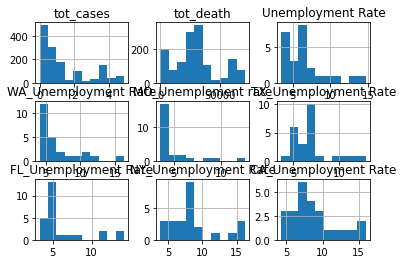

In [52]:
All_Data.hist()

C:\Users\lynds\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



ValueError: could not convert string to float: '7/9/2021'

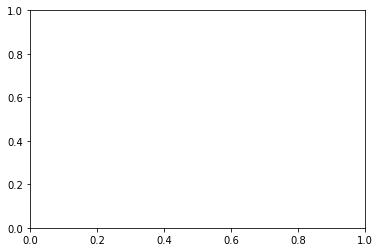

In [53]:
sns.distplot(All_Data)

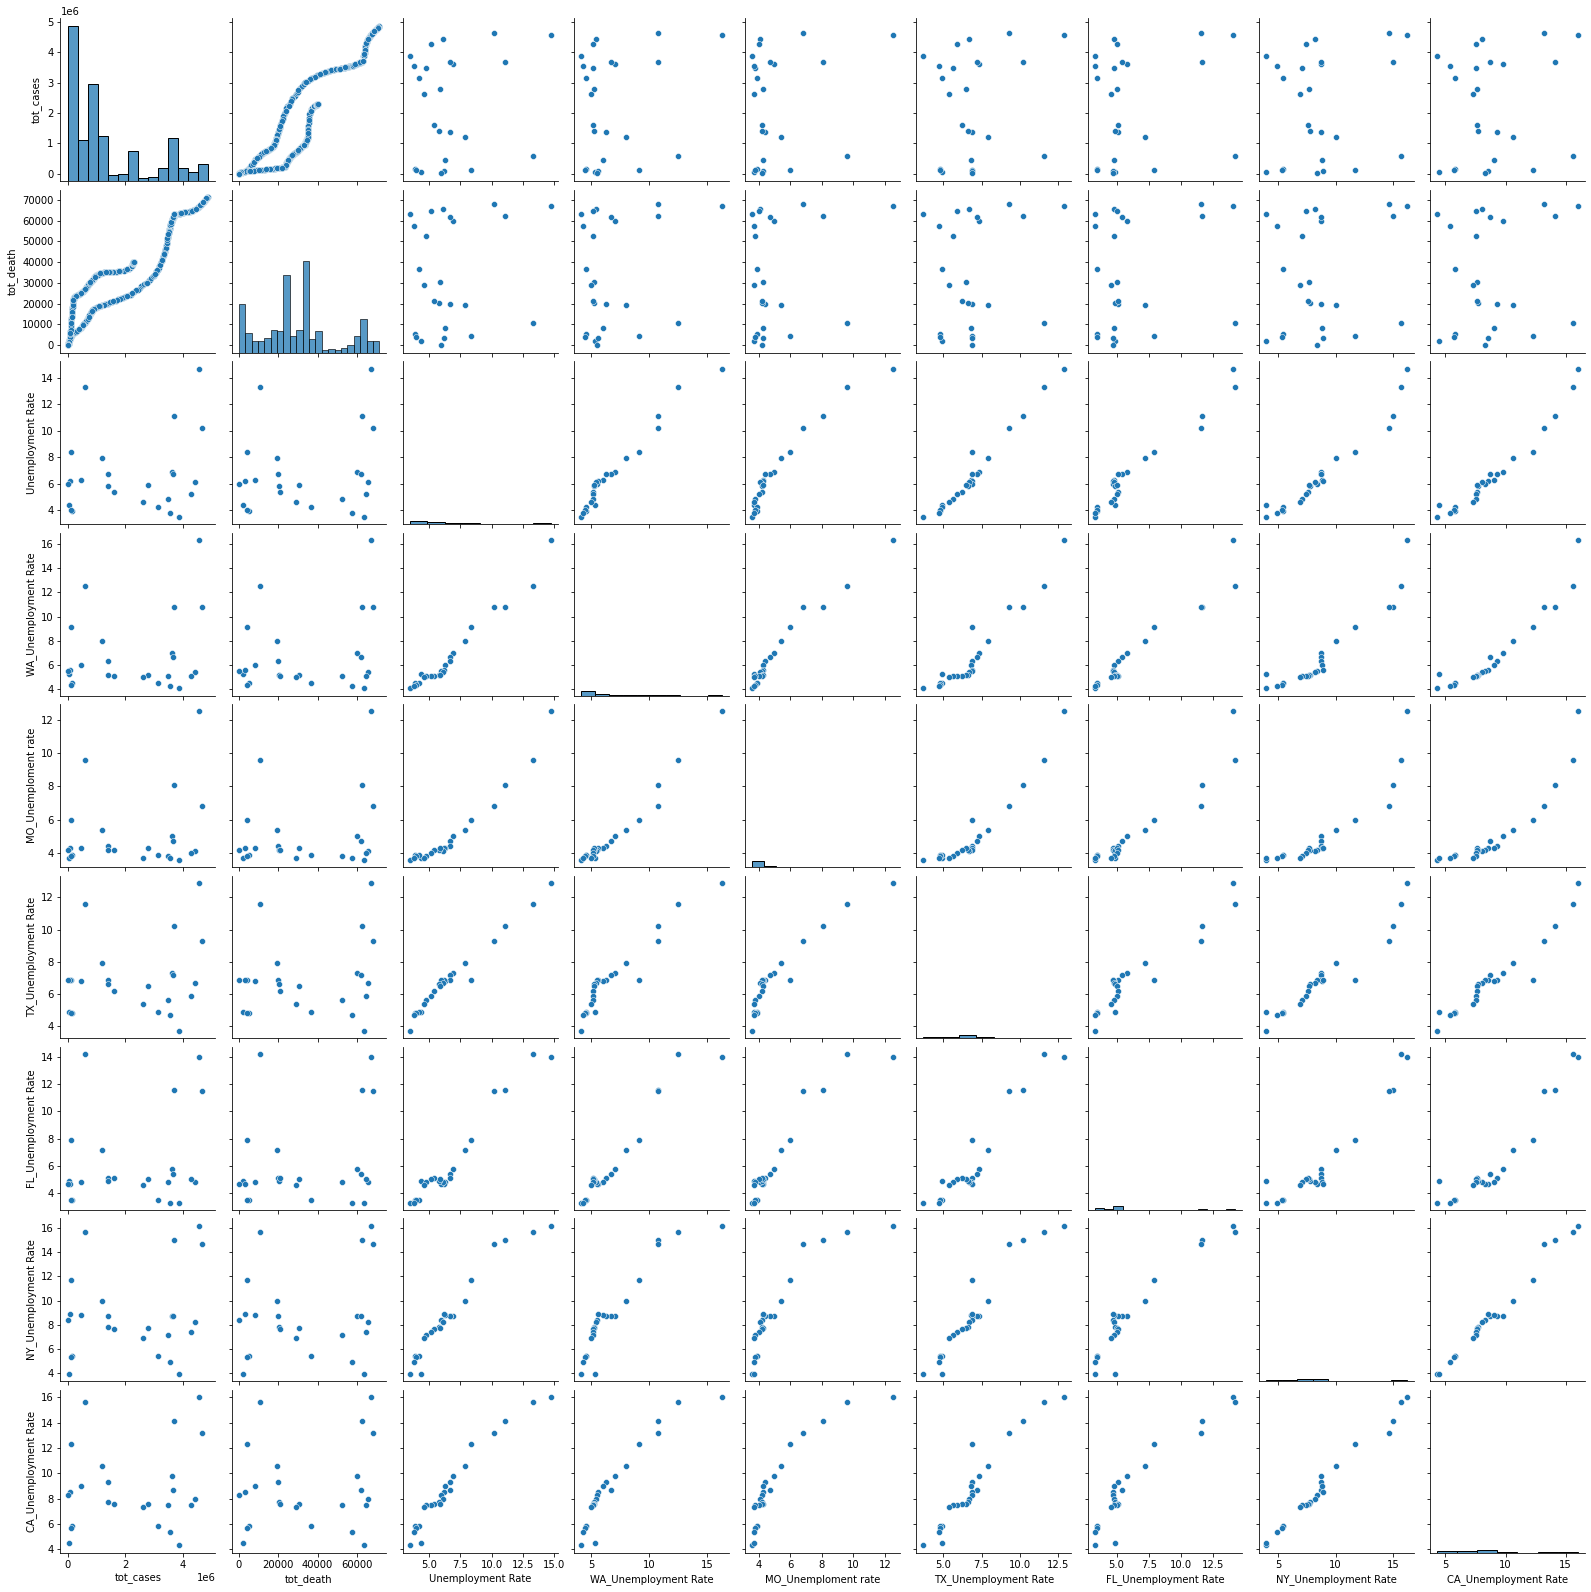

In [55]:
sns.pairplot(All_Data)

#### With the data going every direction you see it's not a normal distribution.

In [59]:
f_oneway(UnemploymentUSA,States,USACovidCases)

ValueError: could not convert string to float: 'Feb-20'

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


ValueError: x and y must be the same size

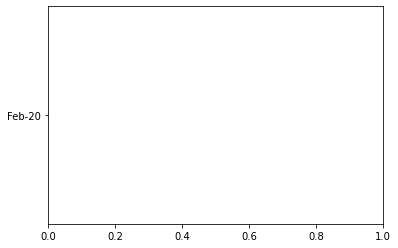

In [68]:
plt.scatter(USACovidCases.tot_cases, UnemploymentUSA.Month)
plt.title('USACovidCases vs. Unemployment')
plt.xlabel('CovidCases')
plt.ylabel('Unemployment')
plt.show()

#### Liner Regression failed as well.